In [166]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Dataset Generation

In [167]:
np.random.seed(2)            #setting random seed to reproduce same randomness for every run

n = 1500                    #total no of points
gaussian_noise = np.random.normal(0, 0.4, n)    # noise, which is a vector of length 'n' , mean '0' , and 0.4 standard deviation

# y = m*x + c + gaussian noise  . This is our dataset that we generate

m = 0.286
c = 4.744

#generating input and output vector
X = np.random.uniform(0, 10, n)
y = m*X + c + gaussian_noise

In [168]:
X_data, X_eval, y_data, y_eval = train_test_split(X, y , test_size=0.3, random_state=45) #split the dataset (both input and output) into test size 3/10th of original size. X_data is given to you on kaggle and X_eval is used for scoring on kaggle

df = pd.DataFrame({'feature': X_data, 'target': y_data})     #make a dataframe out of it

#This part is for kaggle competetion, where public items are displayed in public leaderboard and private items in private leaderboard
usage_list = []
for i in range(len(y_eval)):
    if(i%2==0):
        usage_list.append("Public")
    else:
        usage_list.append("Private")

df1 = pd.DataFrame({'feature': X_eval})
df2 = pd.DataFrame({'target': y_eval, 'Usage':usage_list})


In [169]:
#files to submit on kaggle for making a competetion

#df.to_csv('train.csv', index=True, index_label= "row_id")
#df1.to_csv('test.csv', index=True, index_label= "row_id")
#df2.to_csv('solution.csv', index=True, index_label= "row_id")

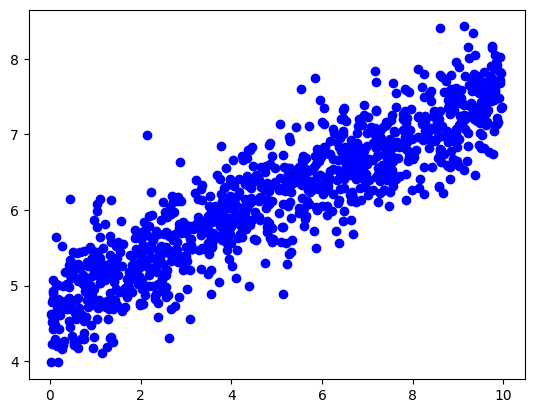

In [170]:
plt.scatter(df['feature'],df['target'], c = 'blue') #scatter plot of given data

#Model Building and Training

In [171]:
X_train, X_test, y_train, y_test = train_test_split(df['feature'], df['target'] , test_size=0.2, random_state=50)   #splitting the given data for validation on test set

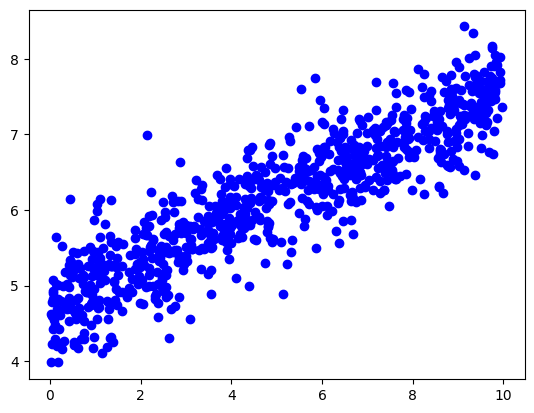

In [172]:
plt.scatter(X_train, y_train, c = 'blue')

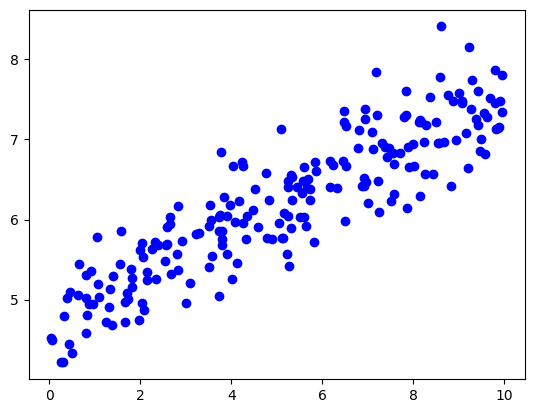

In [173]:
plt.scatter(X_test, y_test, c = 'blue')

In [174]:
#Linear Regression class
class LinearRegression:

    def __init__(self, lr = 0.01, n_iters=2000): #lr = learning rate, n_iters is no of iterations. These both are parameters
        self.lr = lr
        self.n_iters = n_iters
        self.w = 0.0                              #initialize weights and biases to 0. Can initialize a random no. as well
        self.b = 0.0

    def fit(self,X,y):                            #fit function takes the train data as input and trains the model to find optimal weights and biases i.e. 'w' and 'b'

        # model output i.e. forward pass
        def forward(X):
            return self.w * X + self.b

        # loss = Mean Squared Eroor (MSE)
        def loss(y, y_pred):
            return np.mean(np.square(y_pred - y))

        # L = MSE = 1/N * Sum (w*x + b - y)**2
        # dL/dw = 1/N * Sum 2x(w*x + b - y)
        # dL/db = 1/N * Sum 2(w*x + b - y)
        def gradients(X, y, y_pred):             #This calculates the gradients wrt y_pred at that particular point in training
            N = len(X)
            dw = (2/N) * np.dot(X, (y_pred-y))
            db = (2/N) * np.sum(y_pred-y)

            return dw , db

        # Training loop
        for epoch in range(self.n_iters):

            # predict = forward pass
            y_pred = forward(X)

            # loss
            l = loss(y, y_pred)

            # calculate gradients
            dw,db = gradients(X, y, y_pred)

            # update weights
            self.w -= self.lr * dw
            self.b -= self.lr * db

            #print loss at particular epochs
            if epoch % 50 == 0:
                print(f'epoch {epoch+1}: w = {self.w:.3f}, b = {self.b:.3f}, loss = {l:.8f}')


    def predict(self, X):                        #This function just gives the model output i.e. forward pass, used to predict the final data. We use it after using the fit function
        y_pred = np.dot(X, self.w) + self.b
        return y_pred

In [175]:
lr = LinearRegression(0.01,2000)                    # create a linear regression object
lr.fit(X_train,y_train)                    #fit the traning data

y_test_pred = lr.predict(X_test)           #predict both train and test data
y_train_pred = lr.predict(X_train)

epoch 1: w = 0.656, b = 0.123, loss = 38.58939150
epoch 51: w = 0.815, b = 1.211, loss = 3.47211383
epoch 101: w = 0.694, b = 2.015, loss = 2.13333794
epoch 151: w = 0.601, b = 2.636, loss = 1.33559166
epoch 201: w = 0.529, b = 3.114, loss = 0.86023268
epoch 251: w = 0.473, b = 3.484, loss = 0.57697701
epoch 301: w = 0.430, b = 3.769, loss = 0.40819136
epoch 351: w = 0.397, b = 3.990, loss = 0.30761580
epoch 401: w = 0.372, b = 4.160, loss = 0.24768511
epoch 451: w = 0.352, b = 4.291, loss = 0.21197376
epoch 501: w = 0.337, b = 4.392, loss = 0.19069417
epoch 551: w = 0.325, b = 4.471, loss = 0.17801415
epoch 601: w = 0.316, b = 4.531, loss = 0.17045841
epoch 651: w = 0.309, b = 4.578, loss = 0.16595611
epoch 701: w = 0.303, b = 4.614, loss = 0.16327330
epoch 751: w = 0.299, b = 4.641, loss = 0.16167467
epoch 801: w = 0.296, b = 4.663, loss = 0.16072208
epoch 851: w = 0.293, b = 4.679, loss = 0.16015446
epoch 901: w = 0.292, b = 4.692, loss = 0.15981622
epoch 951: w = 0.290, b = 4.702, 

In [176]:
print("weight : " + str(lr.w))
print("bias : " + str(lr.b))

weight : 0.2850557718113087
bias : 4.7351784459622435


#Train Evaluation

In [177]:
# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE):", mse_train)

# Calculate R-squared (R²)
r2_train = r2_score(y_train, y_train_pred)
print("R-squared (R²):", r2_train)

Mean Squared Error (MSE): 0.15931750131090705
R-squared (R²): 0.8166080169450867


Text(0, 0.5, 'y train')

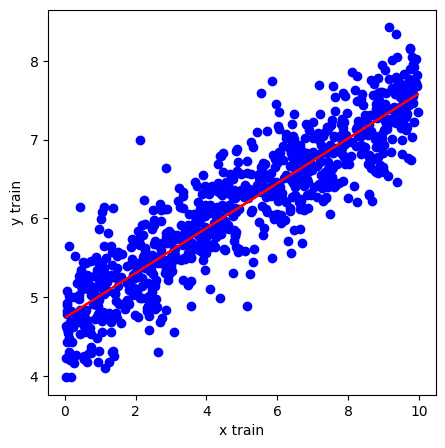

In [178]:
plt.figure(figsize =(5, 5))
ax = plt.axes()

ax.scatter(X_train, y_train, c = 'blue')       #plot the data points
ax.plot(X_train, y_train_pred, c = 'red')      #plot the predicted model

ax.set_xlabel('x train')
ax.set_ylabel('y train')

#Test Evaluation

In [179]:
# Calculate Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE):", mse_test)

# Calculate R-squared (R²)
r2_test = r2_score(y_test, y_test_pred)
print("R-squared (R²):", r2_test)

Mean Squared Error (MSE): 0.15422234389062975
R-squared (R²): 0.8030066776333473


Text(0, 0.5, 'y test')

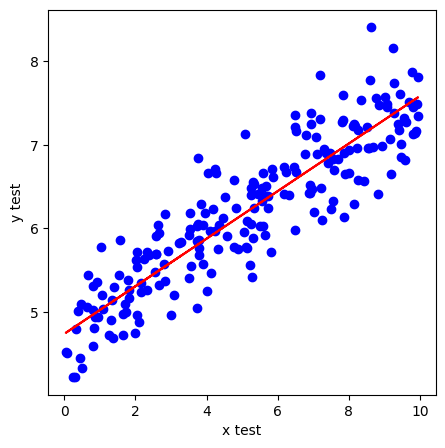

In [180]:
plt.figure(figsize =(5, 5))
ax = plt.axes()

ax.scatter(X_test, y_test, c = 'blue')
ax.plot(X_test, y_test_pred, c = 'red')

ax.set_xlabel('x test')
ax.set_ylabel('y test')

#Evaluation

In [181]:
y_eval_pred = lr.predict(X_eval)

In [182]:
# Calculate Mean Squared Error (MSE)
mse_eval = mean_squared_error(y_eval, y_eval_pred)
print("Mean Squared Error (MSE):", mse_eval)

# Calculate R-squared (R²)
r2_eval = r2_score(y_eval, y_eval_pred)
print("R-squared (R²):", r2_eval)

Mean Squared Error (MSE): 0.16234071643378542
R-squared (R²): 0.7942710530112668


Text(0, 0.5, 'y')

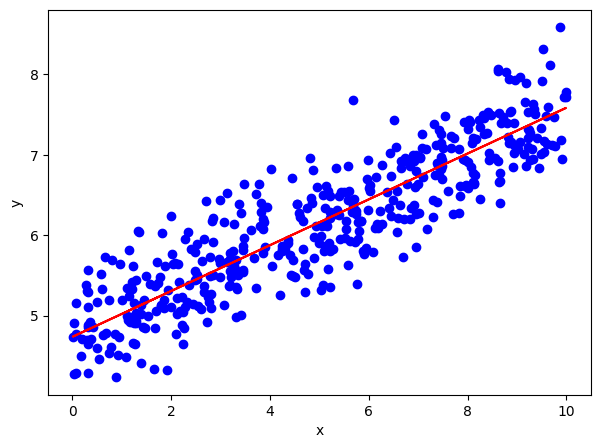

In [183]:
plt.figure(figsize =(7, 5))
ax = plt.axes()

ax.scatter(X_eval, y_eval, c = 'blue')
ax.plot(X_eval, y_eval_pred, c = 'red')

ax.set_xlabel('x')
ax.set_ylabel('y')

In [184]:
#creating the submission file

df3 = pd.DataFrame({'prediction': y_eval_pred})
#df3.to_csv('prediction.csv', index=True, index_label= "row_id")

In [185]:
#creating sample file for kaggle competetion

sample_list = np.random.normal(10, 0.4, len(y_eval))
df4 = pd.DataFrame({'prediction': sample_list})
#df4.to_csv('sample_submission.csv', index=True, index_label= "row_id")